# Customer Segmentation for Personalized Marketing

I collected these dataset from Kaggle(https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data?select=Mall_Customers.csv). I will use curve fitting to identify the pattern between independent & dependent variables. Furthermore, I will use K Means clustering for customer segmentation to perform personalized marketing.

## Import Libraries

In [173]:
# Importing relevant Python libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [39]:
# Now I am loading data set using  pandas 

MC_data = pd.read_csv('Mall_Customers_Data.csv')

In [108]:
# Checking first 4 rows of our data sets

MC_data.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [352]:
# Checking last 2 rows of our data sets

MC_data.tail(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [41]:
#  Changing  some of the heading of the column

MC_data.rename(columns={'Annual Income (k$)':'Annual_Income_(k$)','Spending Score (1-100)':'Spending_Score_(1-100)'},inplace=True)

# Checking the data frame with revised columns heading
MC_data.head(4)

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


##  Exploratory Data Analysis

In [356]:
# Checking some quick information about  datasets

MC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual_Income_(k$)      200 non-null    int64 
 4   Spending_Score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


__*Insights:*__

-  Gender is categorical variable & rest all are numerical variable

## Statistical Summary

In [358]:
# Checking the statistical summary of these data sets to see how spread the data is

MC_data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


__Insights__

- Frome above summary statistics, I can see  mean & 50% value are similar , it  means maximum data are around mean i.e: these normal distriibuted data

In [360]:
# Checking the statistical summary of categorical data

MC_data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


__Insights__

* There is only two unique  value where female is maximum between two which is 112 times in this dataset

## Checking Skewness

In [372]:
MC_data.drop('Gender',axis=1).skew()

CustomerID                0.000000
Age                       0.485569
Annual_Income_(k$)        0.321843
Spending_Score_(1-100)   -0.047220
dtype: float64

## Checking Kurtosis

In [374]:
MC_data.drop('Gender',axis=1).kurtosis()

CustomerID               -1.200000
Age                      -0.671573
Annual_Income_(k$)       -0.098487
Spending_Score_(1-100)   -0.826629
dtype: float64

## Histogram

In [17]:
def histogram(x,t):
    
    '''Create a histogram to see numerical data distribution
    '''
    sns.histplot(x,color='teal',edgecolor='Black',kde=True)
    mean = x.mean()
    skew = x.skew()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean:{mean:.2f}')
    plt.text(mean, plt.gca().get_ylim()[1] * 0.95,  # Position: near the top
             f'<--- Mean: {mean:.2f}', color='blue', fontsize=12, ha='left')
    plt.title(f'Histogram of {t}',fontsize=15)
    plt.xlabel(t,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.show()

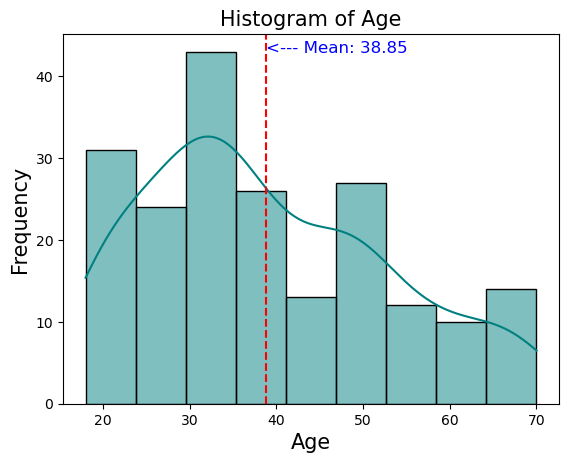

<Figure size 640x480 with 0 Axes>

In [95]:
histogram(MC_data['Age'],'Age')
plt.savefig("Age Histogram.jpg")

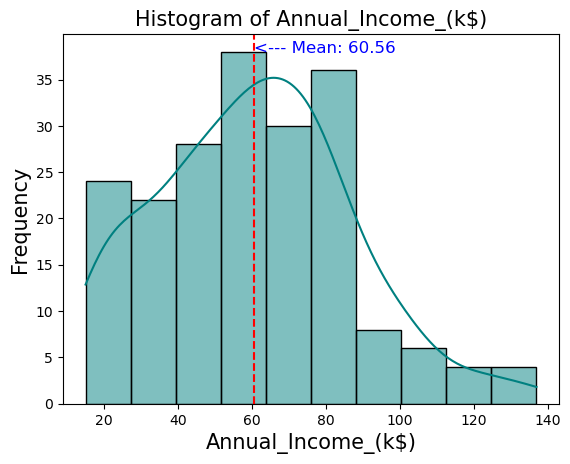

In [21]:
histogram(MC_data['Annual_Income_(k$)'],'Annual_Income_(k$)')
plt.savefig("Annual Income Histogram")

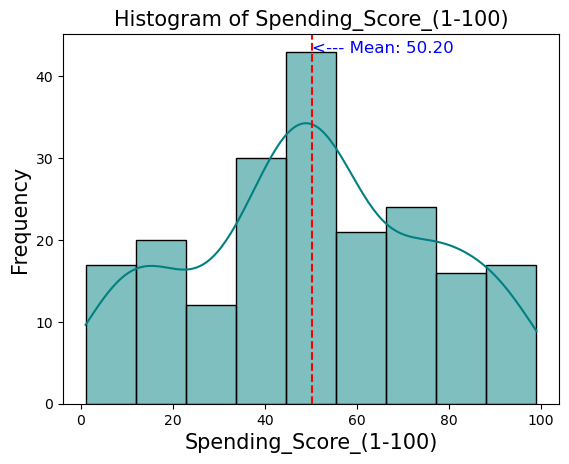

In [23]:
histogram(MC_data['Spending_Score_(1-100)'],'Spending_Score_(1-100)')
plt.savefig("Spending Score Histogram.jpg")

## CountPlot

In [140]:
def count_plot(df,t):
    '''Create a count plot to see categorical data distribution
    '''
    sns.countplot(data=df,x='Gender',palette=['teal','red'])
    plt.title(f'Count Plot of {t}',fontsize=15)
    plt.xlabel('Gender',fontsize=15)
    plt.ylabel('Count',fontsize=15)

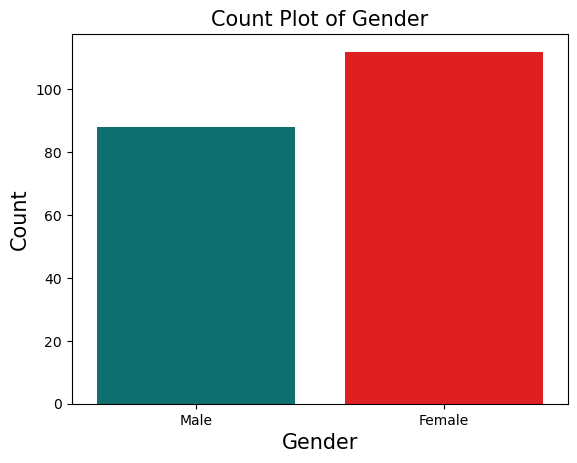

In [142]:
count_plot(MC_data,'Gender')
plt.savefig("Count Plot.jpg")

## BoxPlot

In [158]:
def boxplot(x,y,df,x_label,y_label):

    '''Function to create box plot'''
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x, y=y, data=df,palette=['teal','red'])
    plt.title(f"Box Plot of {y_label} by {x_label}",fontsize=15)
    plt.xlabel(x_label,fontsize=15)  
    plt.ylabel(y_label,fontsize=15)
    plt.show()

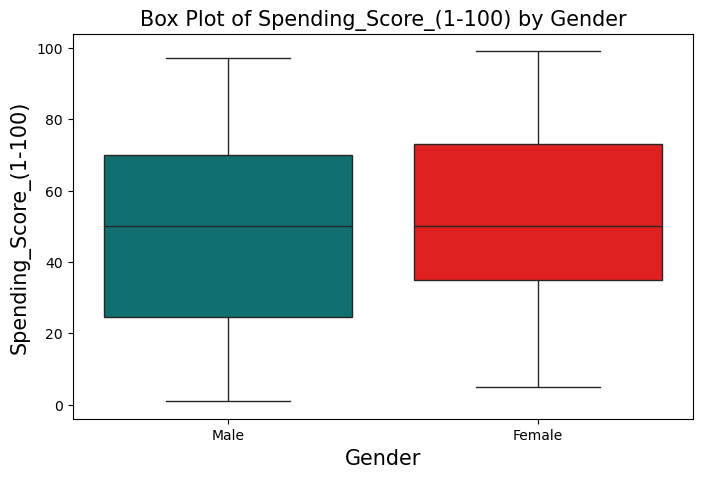

<Figure size 640x480 with 0 Axes>

In [160]:
boxplot(MC_data['Gender'],MC_data['Spending_Score_(1-100)'],MC_data,'Gender','Spending_Score_(1-100)')
plt.savefig("Boxplot.jpg")

## Pairplot

In [196]:
def pairplot(df):
    
    '''Creating pariplot to see  relation among each variables'''

    sns.pairplot(df)

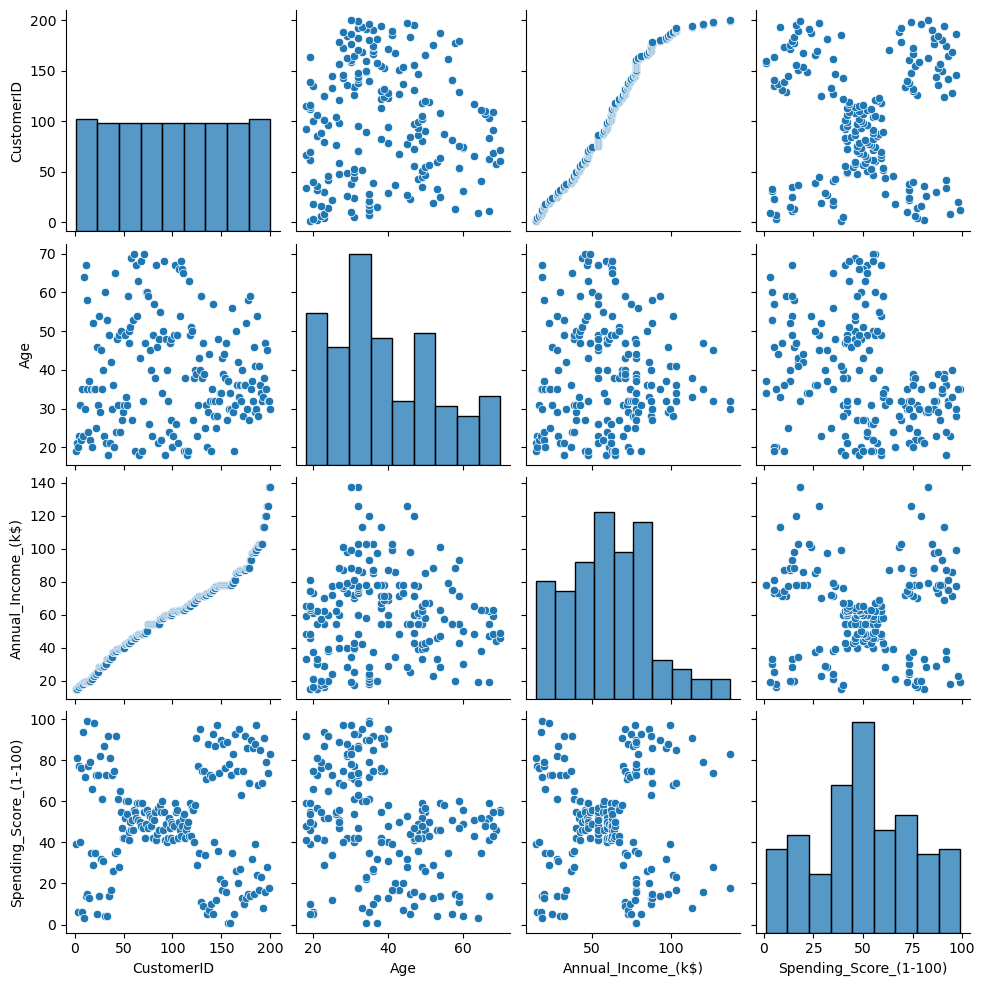

In [198]:
pairplot(MC_data)
plt.savefig("pairplot.jpg")

## Scatter Plot with Line

In [114]:
def plot_random_scatter_with_line(x, y, xline, yline,x_label,y_label):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)

    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k-')
    
    # formatting
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter plot of {x_label} & {y_label} with overplotted line',fontsize=10)
    plt.show()
    return

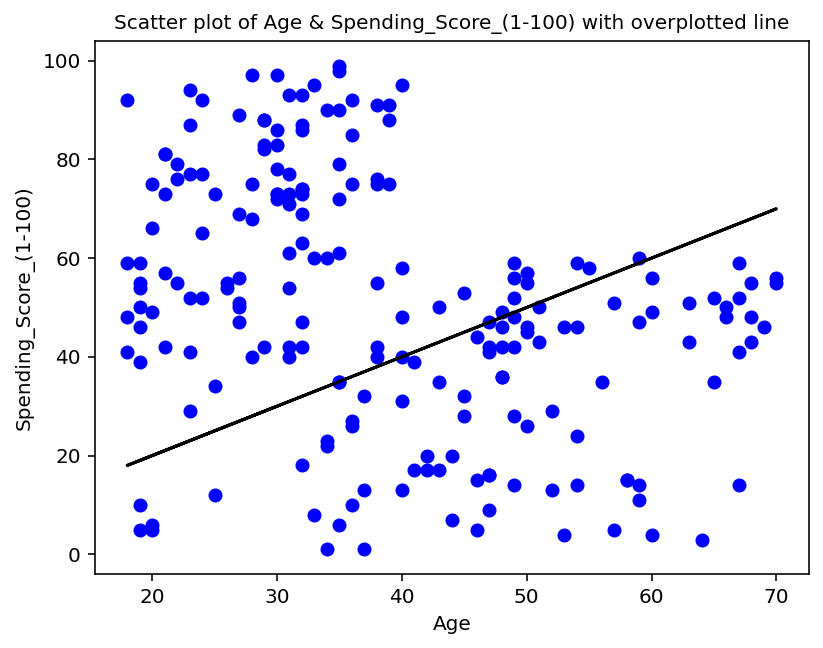

<Figure size 640x480 with 0 Axes>

In [116]:
plot_random_scatter_with_line(MC_data['Age'],MC_data['Spending_Score_(1-100)'],MC_data['Age'],MC_data['Age'],'Age','Spending_Score_(1-100)')
plt.savefig("scatter plot.jpg")

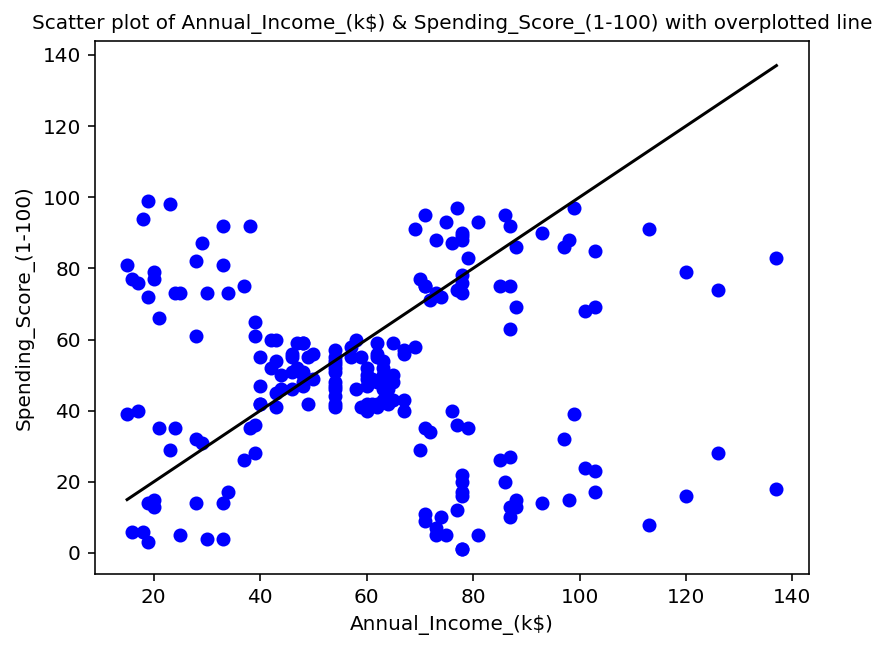

In [118]:
plot_random_scatter_with_line(MC_data['Annual_Income_(k$)'],MC_data['Spending_Score_(1-100)'],MC_data['Annual_Income_(k$)'],MC_data['Annual_Income_(k$)'],'Annual_Income_(k$)','Spending_Score_(1-100)')

# Fitting 

In [43]:
# now let's actually fit this data instead of just the assumed model
def linfunc(x, a, b):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = a*x + b
    return y

In [45]:
p, cov = curve_fit(linfunc, MC_data['Age'], MC_data['Spending_Score_(1-100)'])  # give it the function to be fitted then x and y

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = -0.60 +/- 0.12
b = 73.70 +/- 5.12


In [47]:
p_np = Poly.fit(MC_data['Age'], MC_data['Spending_Score_(1-100)'], 1)  # Polynomial just needs x, y data and the number of degrees
cov = np.polyfit(MC_data['Age'], MC_data['Spending_Score_(1-100)'], 1, cov=True)[1]  # need a separate call as numpy devs have still not merged
sigma_np = np.sqrt(np.diag(cov))

b, a = p_np.convert().coef  # note the opposite order of coefficients
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

a = -0.60 +/- 0.12
b = 73.70 +/- 5.12


## Scatter  Plot with Fitted Line 

In [49]:
def plot_random_scatter_with_fitted_line(x, y, xline, yline,x_label,y_label):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)

    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k--')

    # make some data for the fitted line, using scipy
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'k-')  # note the call to the defined function
    # see error margins as f(x) = ax + b
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.1)
    
    # formatting
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter plot of {x_label} and {y_label} data with overplotted line',fontsize=9)
    plt.show()
    return

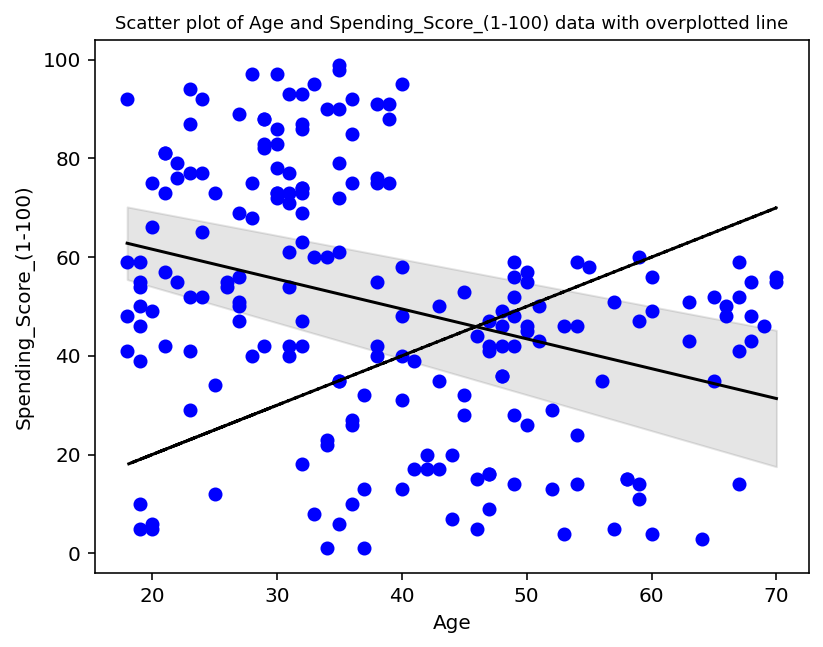

In [51]:
plot_random_scatter_with_fitted_line(MC_data['Age'],MC_data['Spending_Score_(1-100)'],MC_data['Age'],MC_data['Age'],'Age','Spending_Score_(1-100)')

## Predicting the Spending Score based on the Age

In [53]:
# Suppose, 

a = -0.71
b = 75.80
Age = 67

Spending_score = linfunc(Age,a, b)
print(f'Spending_score for {Age} years old person: {Spending_score:.2f}')


Spending_score for 67 years old person: 28.23


In [164]:
# now let's actually fit this data instead of just the assumed model
def linfunc(x, a, b):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = a*x + b
    return y

In [57]:
p, cov = curve_fit(linfunc, MC_data['Annual_Income_(k$)'], MC_data['Spending_Score_(1-100)'])  # give it the function to be fitted then x and y

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")

a = 0.01 +/- 0.07
b = 49.61 +/- 4.61


In [59]:
p_np = Poly.fit(MC_data['Annual_Income_(k$)'], MC_data['Spending_Score_(1-100)'], 1)  # Polynomial just needs x, y data and the number of degrees
cov = np.polyfit(MC_data['Annual_Income_(k$)'], MC_data['Spending_Score_(1-100)'], 1, cov=True)[1]  # need a separate call as numpy devs have still not merged
sigma_np = np.sqrt(np.diag(cov))

b, a = p_np.convert().coef  # note the opposite order of coefficients
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

a = 0.01 +/- 0.07
b = 49.61 +/- 4.61


In [61]:
def plot_random_scatter_with_fitted_line(x, y, xline, yline,x_label,y_label):
    """
    Creates a scatter plot of random x and y data with overplotted line
    """
    plt.figure(dpi=144)

    # scatter plot
    plt.plot(x, y, 'bo')
    plt.plot(xline, yline, 'k--')

    # make some data for the fitted line, using scipy
    xfit = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'k-')  # note the call to the defined function
    # see error margins as f(x) = ax + b
    plt.fill_between(xfit, linfunc(xfit, p[0] - sigma[0], p[1] - sigma[1]),
                     linfunc(xfit, p[0] + sigma[0], p[1] + sigma[1]), color='k', alpha=0.1)
    
    # formatting
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatter plot of {x_label} and {y_label} data with overplotted line',fontsize=8)
    plt.show()
    return

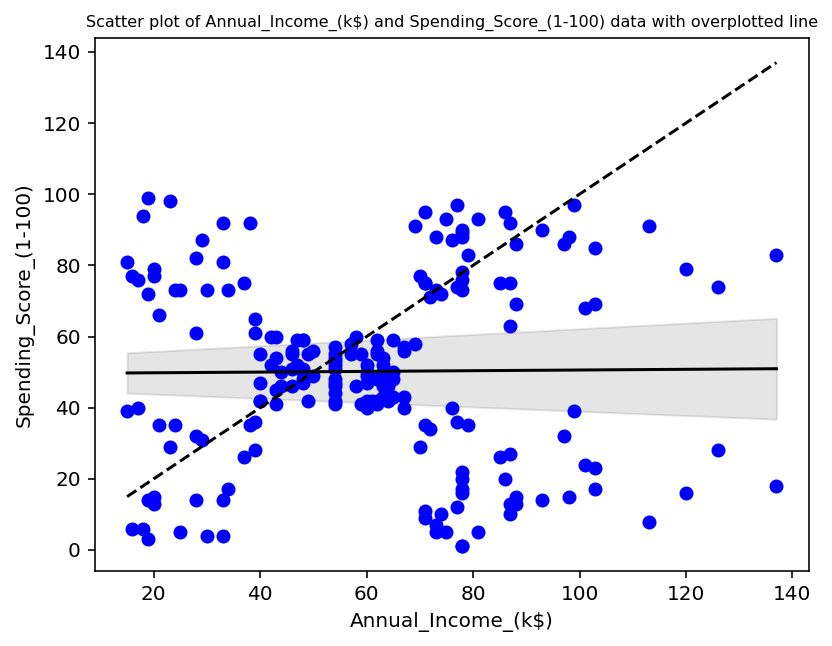

In [63]:
plot_random_scatter_with_fitted_line(MC_data['Annual_Income_(k$)'],MC_data['Spending_Score_(1-100)'],MC_data['Annual_Income_(k$)'],MC_data['Annual_Income_(k$)'],'Annual_Income_(k$)','Spending_Score_(1-100)')

## Predicting the Spending Score based on the Annual Income

In [65]:
# Suppose, 

a = 0.08
b = 45.62
Annual_Income = 95

Spending_score = linfunc(Annual_Income,a, b)
print(f'Spending_score for person whose annual income is $ {Annual_Income}000 : {Spending_score:.2f}')

Spending_score for person whose annual income is $ 95000 : 53.22


## Clustering

Based on above analysis, it is visible that Annual_Income_(k$) & Spending_Score_(1-100) can be used for clustering  

In [67]:
Clustering_data = MC_data[['Annual_Income_(k$)','Spending_Score_(1-100)']]

In [69]:
# creating a custom colormap for plotting
from matplotlib.colors import ListedColormap
colours = plt.cm.Set1(np.linspace(0, 1, 5))
cmap = ListedColormap(colours)

In [176]:
# Guessing number of clsuter
ncluster = 5
# set up the clusterer with the number of shown in above scatter plot 
# kmeans starts with a random seed and repeats the clustering n_init times.
kmeans = KMeans(n_clusters=ncluster, n_init=20)

# Fit the data, results are stored in the kmeans object
model = kmeans.fit(MC_data[['Annual_Income_(k$)','Spending_Score_(1-100)']]) 

labels = kmeans.labels_  # the group for each fitted point
    
# the estimated cluster centres
centroids = kmeans.cluster_centers_

xkmeans = centroids[:, 0]
ykmeans = centroids[:, 1]

In [73]:
def plot_fitted_clusters(x,y,x_label,y_label):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(x, y,c=labels, cmap=cmap, marker='o', label='Data')
    
    ax.plot(xkmeans, ykmeans, 'bs', ms=10, label='Estimated Centres')
    
    cbar = fig.colorbar(s, ax=ax)
    #cbar.set_ticks(np.unique(y))
    ax.legend()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'Clustering based on {x_label} & {y_label}',fontsize=8)
    plt.show()
    return

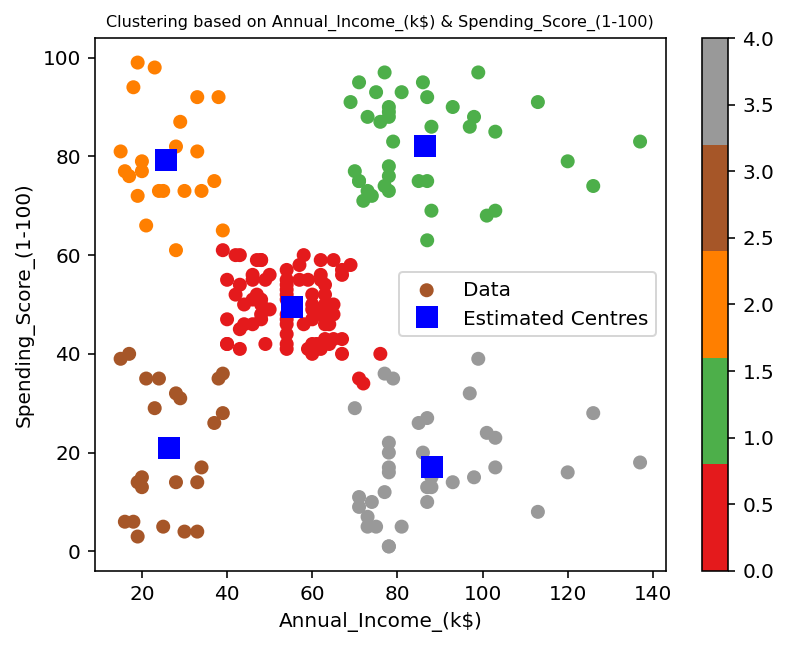

In [269]:
plot_fitted_clusters(Clustering_data['Annual_Income_(k$)'],Clustering_data['Spending_Score_(1-100)'],'Annual_Income_(k$)','Spending_Score_(1-100)')

## Predicting Cluster Label from Given Data 

In [75]:
Annual_Income = 97
Spending_Score = 32

Cluster_Label = kmeans.predict([[Annual_Income, Spending_Score]])[0]

print(f'Cluster_Label is {Cluster_Label} if Annual income is {Annual_Income} & Spending Score is {Spending_Score}')

Cluster_Label is 1 if Annual income is 97 & Spending Score is 32


## Checking Silhouette Score to assess quality of clusters 

In [81]:
def one_silhoutte(n, cd):
    """ 
    Calculates the silhoutte score for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(cd)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    Score = silhouette_score(cd, labels)
    return Score


In [83]:
Score = one_silhoutte(5, Clustering_data)

if Score > 0:
    print(f'Model is well-formed clusters as Silhouette score is {Score:.2f} ')
elif Score < 0:
    print(f'Points might be assigned to the wrong clusters as Silhouette score is {Score:.2f}')
else:
    print(f'Points are on or very close to the decision boundary between two clusters as Silhouette score is {Score:.2f}')

Model is well-formed clusters as Silhouette score is 0.55 


In [87]:
# can automate the looking at cluster numbers (beware computational time)
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score = one_silhoutte(n, Clustering_data)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.30
 3 clusters silhoutte score = 0.47
 4 clusters silhoutte score = 0.49
 5 clusters silhoutte score = 0.55
 6 clusters silhoutte score = 0.54
 7 clusters silhoutte score = 0.53
 8 clusters silhoutte score = 0.46
 9 clusters silhoutte score = 0.46
10 clusters silhoutte score = 0.45
Best number of clusters =  5


## Elbow Method

In [89]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('Number of clusters')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    ax.set_title('Elbow Method to determine number of cluster')
    plt.show()
    return

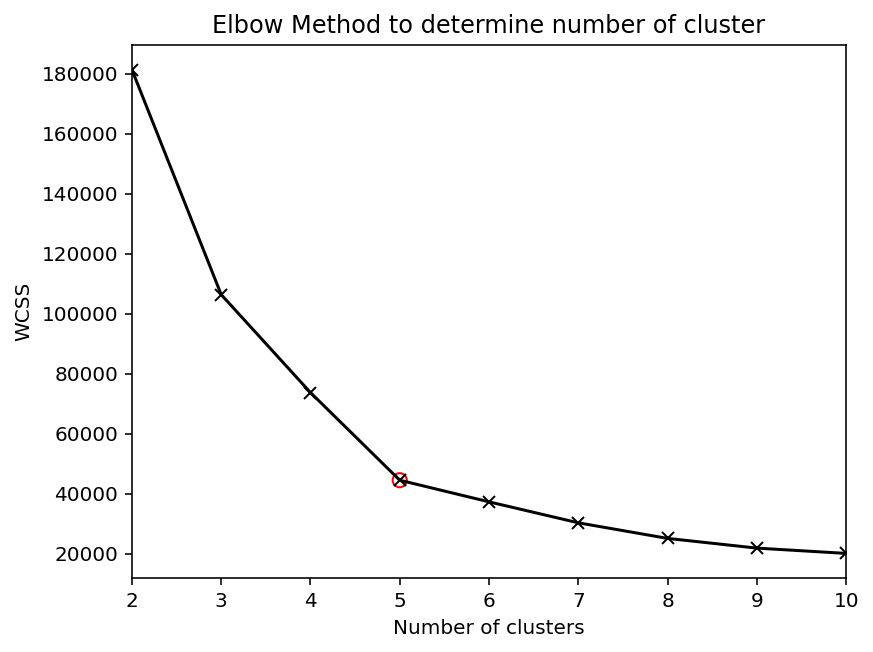

In [93]:
wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(Clustering_data)
    wcss.append(kmeans.inertia_)

plot_elbow_method(2, 10, wcss, best_n)

From above elbow method , it is visible that 5 is correct number of cluster what we 